<a href="https://colab.research.google.com/github/sarasafaee/nlp_basics/blob/main/spam_classification_word_embedding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv("SPAM text message 20170820 - Data.csv")
print(df.head())


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


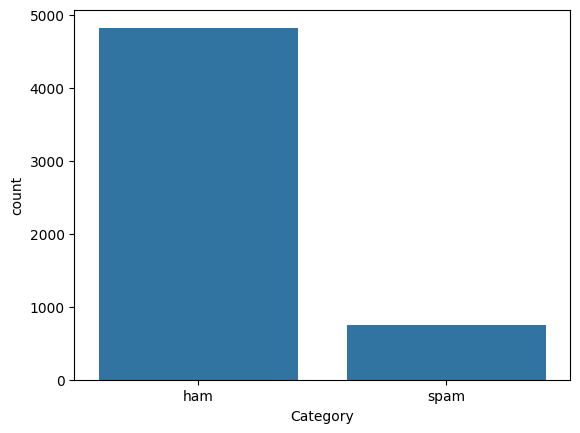

In [4]:
sns.countplot(x=df["Category"])
plt.show()

In [7]:
X = df["Message"]
Y = df["Category"]

print(Y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)
print(Y)
print(Y.shape)


0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: Category, Length: 5572, dtype: object
[0 0 1 ... 0 0 0]
(5572,)


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

from tensorflow.keras.preprocessing.text import Tokenizer
max_words = 500
tkn = Tokenizer(num_words=max_words)
tkn.fit_on_texts(X_train)
seq = tkn.texts_to_sequences(X_train)
print(seq)

[[32, 6, 391, 41, 10, 8, 94, 1, 57, 355, 499, 292, 260], [124, 336, 48, 19, 15, 19, 6], [1, 201, 205, 2, 79, 3, 52, 229, 5, 229], [56, 95, 85, 73, 36, 81, 2, 129], [130, 9, 39, 5, 211, 67, 6, 293, 15], [294, 1, 57, 118, 36], [369, 16, 10, 370, 295], [100, 39, 9, 51, 52, 22, 3], [1, 167, 81, 19, 413, 6, 1, 168, 6, 11, 430, 51, 29, 430], [478, 29, 6, 96, 14, 280, 9, 125, 431, 83, 432, 150, 15, 180, 83, 371, 17, 247, 65, 94], [5, 2, 33, 4, 5, 102, 36, 111, 51, 4, 26, 4, 48, 41, 45], [], [17, 4, 115, 2, 7, 5, 2, 24, 38, 34, 5, 25, 34, 20, 9, 2, 79, 3, 356], [40, 136, 46, 212], [273, 325, 11, 268, 21, 6, 337, 151], [146, 14, 8, 53, 15, 174], [190, 12, 444, 53, 12, 10, 1, 167], [1, 338, 346, 74, 121, 96, 111, 296], [3, 17, 111, 102, 153, 108, 16], [156, 216, 156, 18, 11, 150], [40, 17, 202, 12, 224, 217, 2, 29, 465, 12, 433, 203, 236], [273, 326], [62, 1, 20, 119], [85, 9, 82, 65, 35, 392, 1, 63, 34, 3, 35, 392, 1, 26, 3, 38, 59, 29, 37, 55], [479, 6, 9, 14, 3, 157, 26, 16, 21, 357, 327, 347

In [9]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len = 100
padded_docs = pad_sequences(seq, padding = 'pre', maxlen= max_len)
print(padded_docs)

[[  0   0   0 ... 499 292 260]
 [  0   0   0 ...  15  19   6]
 [  0   0   0 ... 229   5 229]
 ...
 [  0   0   0 ...  22   3  71]
 [  0   0   0 ...  53   8 277]
 [  0   0   0 ... 206 114  21]]


In [10]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
embedding_vector_features = 30
model = Sequential()
model.add(Embedding(max_words, embedding_vector_features, input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [11]:
model.fit(padded_docs,Y_train,batch_size=128,epochs=10, validation_split=0.2)

text_seq = tkn.texts_to_sequences(X_test)
test_padded = pad_sequences(text_seq, maxlen = max_len)

accr = model.evaluate(test_padded, Y_test)
print(accr)

Epoch 1/10
28/28 [==============================] - 23s 712ms/step - loss: 0.4159 - accuracy: 0.8488 - val_loss: 0.3090 - val_accuracy: 0.8520
Epoch 2/10
28/28 [==============================] - 19s 691ms/step - loss: 0.1631 - accuracy: 0.9470 - val_loss: 0.1180 - val_accuracy: 0.9574
Epoch 3/10
28/28 [==============================] - 22s 792ms/step - loss: 0.0739 - accuracy: 0.9756 - val_loss: 0.0849 - val_accuracy: 0.9709
Epoch 4/10
28/28 [==============================] - 19s 685ms/step - loss: 0.0527 - accuracy: 0.9849 - val_loss: 0.0968 - val_accuracy: 0.9641
Epoch 5/10
28/28 [==============================] - 25s 893ms/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.0800 - val_accuracy: 0.9742
Epoch 6/10
28/28 [==============================] - 19s 691ms/step - loss: 0.0348 - accuracy: 0.9902 - val_loss: 0.0785 - val_accuracy: 0.9753
Epoch 7/10
28/28 [==============================] - 20s 735ms/step - loss: 0.0324 - accuracy: 0.9905 - val_loss: 0.0797 - val_accuracy: 0.9787